# Natural Language Processing with Python

Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora. 

***

## Production Level NLP using spaCy 

- spaCy is a free, open-source library for advanced natural language processing in Python.

- spaCy is designed specifically for **production** use and helps you build applications that process and "understand" large volumes of text. It can be used to build **information extraction** or **natural language understanding systems**, or to pre-process text for **deep learning**. Comes with built in multi-threading capabilities.

- spaCy excels at large-scale information extraction tasks. It's written from the ground up in carefully memory-managed Cython.

In [1]:
import spacy
nlp = spacy.load('en_core_web_md')

In [2]:
doc = nlp(u'Kroger is an American retailing company founded by Bernard Kroger in 1883 in Cincinnati, Ohio.')

___
## spaCy Pipeline

![pipeline](assets/pipeline.png)
When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. 

In [3]:
import pandas as pd
text = [d.text for d in doc]
pos = [d.pos_ for d in doc]
tag = [d.tag_ for d in doc]
lemma = [d.lemma_ for d in doc]
ent = [d.ent_type_ for d in doc]
dep = [d.dep_ for d in doc]
loc = [d.idx for d in doc]
num = [d.like_num for d in doc]
shape = [d.shape_ for d in doc]
punct = [d.is_punct for d in doc]
df = pd.DataFrame({'PoS': pos, 'Tag': tag, 'Lemma': lemma, 'Entity Type':ent, 'Dependency':dep, 'Location':loc, 'Is Number?':num, 'Shape':shape, 'Is Punctuation?':punct}, columns = ['Location', 'Lemma', 'Shape', 'PoS', 'Tag', 'Dependency', 'Entity Type','Is Number?', 'Is Punctuation?'], index=text)
df

,Location,Lemma,Shape,PoS,Tag,Dependency,Entity Type,Is Number?,Is Punctuation?
Kroger,0,kroger,Xxxxx,PROPN,NNP,nsubj,ORG,False,False
is,7,be,xx,VERB,VBZ,ROOT,,False,False
an,10,an,xx,DET,DT,det,,False,False
American,13,american,Xxxxx,ADJ,JJ,amod,NORP,False,False
retailing,22,retailing,xxxx,NOUN,NN,compound,,False,False
company,32,company,xxxx,NOUN,NN,attr,,False,False
founded,40,found,xxxx,VERB,VBN,acl,,False,False
by,48,by,xx,ADP,IN,agent,,False,False
Bernard,51,bernard,Xxxxx,PROPN,NNP,compound,PERSON,False,False
Kroger,59,kroger,Xxxxx,PROPN,NNP,pobj,PERSON,False,False


___
## DisplaCy Dependency Visualizer
![displacy](assets/displacy.png)

___
## Word Vectors and Word Vector Similarities

Dense, real valued vectors representing distributional similarity information are now a cornerstone of practical NLP. The most common way to train these vectors is the word2vec family of algorithms. The default spaCy English model installs 300-dimensional
vectors trained on the Common Crawl corpus.

![wordvec](assets/word_vec.png)

In [4]:
a = [nlp(u'Peach'), nlp(u'apricot'), nlp(u'cherry'), nlp(u'Watermelon'), nlp(u'Cheddar'), nlp(u'gouda'), nlp(u'cashew'), nlp(u'peanut')]
b = [a[i-1] for i in range(len(a))]
aa = [i[0].lemma_ for i in a]
bb = [i[0].lemma_ for i in b]

sims = [a[i][0].similarity(b[i][0]) for i in range(len(a))]

df = pd.DataFrame({'Ingredient A': aa, 'Ingredient B': bb, 'Word Vector Similarity':sims})
df.sort_values('Word Vector Similarity', ascending=False)

,Ingredient A,Ingredient B,Word Vector Similarity
1,apricot,peach,0.787884
5,gouda,cheddar,0.743536
7,peanut,cashew,0.665553
2,cherry,apricot,0.617553
3,watermelon,cherry,0.545963
0,peach,peanut,0.462357
6,cashew,gouda,0.446148
4,cheddar,watermelon,0.408401


___
## Similarities in Context

Aside from spaCy's built-in word vectors, which were trained on a lot of text with a wide vocabulary, the parsing, tagging and NER models also rely on vector representations of the **meanings of words in context**. As the first component of the processing pipeline, the tensorizer encodes a document's internal meaning representations as an array of floats, also called a tensor. This allows spaCy to make a reasonable guess at a word's meaning, based on its surrounding words. Even if a word hasn't been seen before, spaCy will know something about it. Because spaCy uses a 4-layer convolutional network, the tensors are sensitive to up to **four words on either side of a word**. This is a feature of spaCy v2.0, so currently the word vectors for a word will be the same regardless of it's context.

In [5]:
doc1 = nlp(u"The labrador barked.")
doc2 = nlp(u"The labrador swam.")
doc3 = nlp(u"the labrador people live in canada.")

for doc in [doc1, doc2, doc3]:
    labrador = doc[1]
    dog = nlp(u"dog")
    print(labrador.similarity(dog))

0.634902616207
0.634902616207
0.634902616207


In [8]:
doc = nlp(u'mustard')
doc2 = nlp(u'ketchup')

In [12]:
doc.similarity(doc)

0.99999993712503077

![sims](assets/sims_in_context.png)

___
## 84.51 Example spaCy Usage
We want to identify grocery products in recipes. We then want to find out which products are most similar to each other, in case we need to recommend substitutes for a recipe.

First, we need to train an named entity recognizer (NER) to be able to identify grocery products.

In [13]:
import training_data

ner = spacy.language.EntityRecognizer(nlp.vocab, entity_types = ['PRODUCT'])
train_data = training_data.train_data
train_data[25:30]

[('2 medium green apples, peeled and cored', [(15, 21, 'PRODUCT')]),
 ('1/2 cup watercress', [(8, 18, 'PRODUCT')]),
 ('1 small white onion, small diced', [(8, 19, 'PRODUCT')]),
 ('2 large skinless, boneless chicken thighs', [(18, 41, 'PRODUCT')]),
 ('5 cups chicken broth', [(7, 20, 'PRODUCT')])]

![training](assets/training.png)

spaCy's models are statistical and every "decision" they make – for example, which part-of-speech tag to assign, or whether a word is a named entity – is a prediction. This prediction is based on the examples the model has seen during training. To train a model, you first need training data – examples of text, and the labels you want the model to predict. This could be a part-of-speech tag, a named entity or any other information.

The model is then shown the unlabelled text and will make a prediction. Because we know the correct answer, we can give the model feedback on its prediction in the form of an **error gradient** of the **loss function** that calculates the difference between the training example and the expected output. The greater the difference, the more significant the gradient and the updates to our model.

In [14]:
import random

def train_ner(rounds):
    for itn in range(rounds):
        random.shuffle(train_data)
        for raw_text, entity_offsets in train_data:
            doc = nlp.make_doc(raw_text)
            gold = spacy.gold.GoldParse(doc, entities = entity_offsets)

            nlp.tagger(doc)
            ner.update(doc, gold, drop=0.5)

![training2](assets/training2.png)


| Part        | Description           |
| :-------------: |:-------------:| 
| **Training data**      | The training examples. |
| **Text and label**     | The current example.      | 
| **Doc** | A Doc object created from the example text.      |  
| **GoldParse** | A GoldParse object of the Doc and label.      |  
| **nlp** | The nlp object with the model.      |  
| **Optimizer** | A function that holds state between updates.      |  
| **Update** | Update the model's weights.      |  

In [15]:
train_ner(500)
nlp = spacy.load('en_core_web_md', entity = ner)

In [16]:
recipe = ['1 cup dried cherries',
'2 Granny Smith apples, cored and cut into matchsticks',
'8 oz. Smoked Gouda, cubed',
'1 cup halved cashews',
'8 cups spinach',
'2 cups cooked and cooled quinoa',
'1 cup red wine vinaigrette']

In [17]:
recipe_docs = [doc for doc in nlp.pipe(recipe, batch_size = 10, n_threads = -1)]
recipe_docs

[1 cup dried cherries,
 2 Granny Smith apples, cored and cut into matchsticks,
 8 oz. Smoked Gouda, cubed,
 1 cup halved cashews,
 8 cups spinach,
 2 cups cooked and cooled quinoa,
 1 cup red wine vinaigrette]

In [20]:
for recipe in recipe_docs:
    if recipe.ents:
        print(recipe.ents, recipe.ents[0][0].ent_type_)

(cherries,) PRODUCT
(apples,) PRODUCT
(Gouda,,) PRODUCT
(cashews,) PRODUCT
(spinach,) PRODUCT
(quinoa,) PRODUCT
(red wine,) PRODUCT


___
# Key Term Extraction using Textacy

Textacy is a Python library for performing higher-level natural language processing (NLP) tasks, built on the high-performance spaCy library. With the basics — tokenization, part-of-speech tagging, dependency parsing, etc. — offloaded to another library, textacy focuses on tasks facilitated by the ready availability of tokenized, POS-tagged, and parsed text.

In [21]:
import textacy
import codecs
import glob

article_path_list = sorted(glob.glob('../mymag-content/articles/mm1704/*'))
article_list = [codecs.open(art, 'r', 'utf-8', errors='ignore').read() for art in article_path_list]

doc_list = [nlp(article) for article in article_list]

corpus = textacy.Corpus('en', texts=article_list)

In [23]:
corpus

Corpus(24 docs; 18799 tokens)

In [24]:
doc = doc_list[17]
doc

Department  select one:
(Note: some department tags will not appear in layout)
Life at Large
Use for parenting, pets, money/finance, seasonal, cleaning, craft/DIY stories

Format: 2 page, recipe
Suggested image(s): Havana-style sceneoutdoors, caf lights, family gathered around table, colorful table accents OR a shot of tablesetting with close up of sauce in a beautiful jar

Headline: 
The Spice of Life
Subhead:
The Secret Grilling Out Cuban-Style is all in the Sauce
Body Text:
Many cuisinesfrom the Canary Islands to Brazilhave a sauce called mojo, but the tart and garlicky Cuban take on mojo sauce is almost a national treasure. Its a mix of citrus juice, garlic, oil and oregano that elevates simple grilled or roasted meats with its sunny, pungent flavor.
Mojo is versatile: use it as a marinade, a finishing sauce, or both. Its a classic with pork shoulder, but you can try it on grilled steaks, chicken, shrimp, or salmon. Its puckery edge is tempered with a generous slick of olive oil, m

Let's look at various ways to get key terms from the document..

In [25]:
textacy.keyterms.key_terms_from_semantic_network(doc)

[('pork', 0.031190178424376575),
 ('sauce', 0.030011905464175374),
 ('mojo', 0.023014517353864332),
 ('-PRON-', 0.017561510741153665),
 ('oil', 0.013689323376452952),
 ('tenderloin', 0.012415933414090157),
 ('recipe', 0.012353697880689673),
 ('grill', 0.012325702524613366),
 ('cuban', 0.012235343375742253),
 ('juice', 0.010976754300307536)]

In [26]:
idf = corpus.word_doc_freqs(lemmatize=True, weighting='idf', as_strings=True)
textacy.keyterms.sgrank(doc, idf=idf)

/opt/anaconda/2.7/envs/nlp/lib/python3.6/site-packages/textacy/corpus.py:600: DeprecationWarning: `lemmatize` and `lowercase` params are deprecated; use `normalize` instead
  warnings.warn(msg, DeprecationWarning)


[('mojo sauce', 0.1562366977575779),
 ('pork', 0.050739881101236145),
 ('mojo', 0.05046927640105841),
 ('cuban', 0.05023575669981618),
 ('sauce', 0.04626204287986056),
 ('be', 0.026108068833697817),
 ('oregano', 0.025736620695743603),
 ('grill', 0.023861920368678263),
 ('life', 0.020062803642618383),
 ('orange', 0.019893955365258533)]

In [27]:
textacy.keyterms.singlerank(doc)

[('cuban mojo sauce', 0.08379268430755635),
 ('mojo sauce', 0.06966714131026397),
 ('-PRON- mojo', 0.04998856583904791),
 ('grill pork', 0.04789514504886762),
 ('cuban mojo', 0.0467541682532449),
 ('pork tenderloin', 0.04475663431843166),
 ('sauce', 0.03703851605431144),
 ('mojo', 0.03262862525595253),
 ('pork', 0.03222931051761073),
 ('oil grill', 0.031920488501475705)]

In [28]:
textacy.keyterms.singlerank??

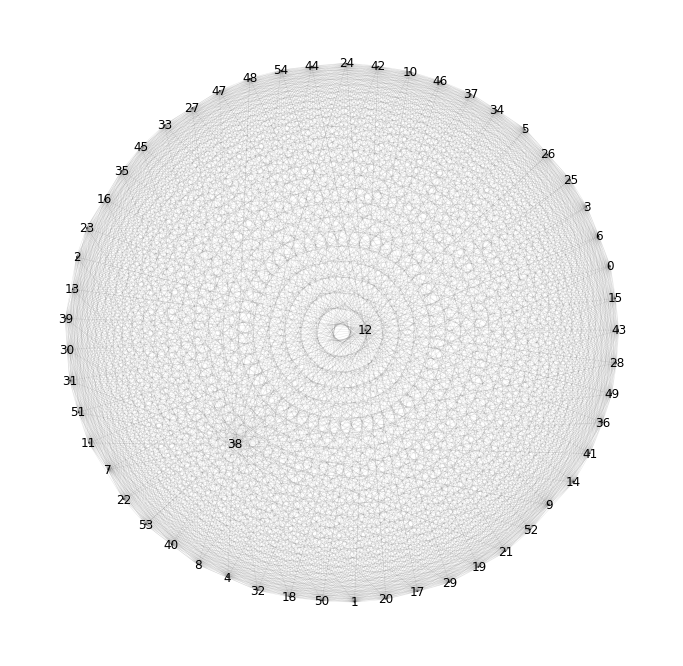

In [29]:
%matplotlib inline

network = textacy.network.sents_to_semantic_network(list(doc.sents))
textacy.viz.network.draw_semantic_network(network)

In [30]:
textacy.lexicon_methods.emotional_valence(doc)

defaultdict(float,
            {'AFRAID': 0.11214024491760304,
             'AMUSED': 0.16260370633454554,
             'ANGRY': 0.09716842021189591,
             'ANNOYED': 0.11131978993750007,
             'DONT_CARE': 0.1274961669741697,
             'HAPPY': 0.15390461878647696,
             'INSPIRED': 0.16354111998194945,
             'SAD': 0.10500263433962269})

___
## Creating our own specialized classes

We can create classes that are more specific to our needs, and bring all of our tools to one place while adding a level abstraction from spaCy.

In [31]:
import os

In [32]:
class Article:
    '''Represents an article from MyMagazine. Contains identified grocery product entities,
    word vectors, and other article data.'''
    
    def __init__(self, article_id):
        '''Initialize an article with the name of the article, so the class can read in the article text from
        a file.'''
        article_list = glob.glob('../mymag-content/articles/mm1704/*')
        self.article_format = os.path.splitext(article_list[0])[1]
        self.article_id = article_id
        self.article_path = [art for art in article_list if str(self.article_id) in str(art)][0]
        
    def read_article(self):
        '''Read in the full text of the article. Sometimes the articles come as .txt files, other
        times they come as .docx. Be able to handle either(and any other formats).'''
        if self.article_format == '.txt':
            self.text = codecs.open(self.article_path, 'r', 'utf-8', errors='ignore').read()
        elif self.article_format == '.docx':
            text = docx.Document(self.article_path)
            full_text = []
            for para in text.paragraphs:
                full_text.append(para.text)
            self.text = '\n'.join(full_text)
        
    def clean_article(self):
        '''Clean the text of the article by splitting on known headers to unneccessary portions
        of the article.'''
        if 'headline:' in self.text.lower():
            self.text = self.text.split('Headline:')[1]
        if 'body text:' in self.text.lower():
            self.text = self.text.split('Body Text:')[1]
        if 'sources:' in self.text.lower():
            self.text = self.text.split('Sources:')[0]
        if 'digital tagging:' in self.text.lower():
            self.text = self.text.split('DIGITAL TAGGING:')[0]
            
    def make_doc(self):
        '''Convert the article text into a spaCy document in order to perform NLP on the article.'''
        self.doc = nlp(self.text)
        
    def get_products(self):
        '''Identifies and creates a list of the "Grocery Product" named entities in the article document.'''
        self.products = list(set([nlp(entity.lemma_) for entity in self.doc.ents]))
        
    def get_similar_subcomms(self, subcomms, threshold=0.8):
        '''Accepts a list of subcommodity spaCy documents and calculateds the word vector similarities between
        all article grocery entities and all subcomm grocery entities. Creates list of subcomms with 
        similarities above a given threshold. Threshold defaults to 0.8'''
        similarities = [[self.article_id, prod.text.strip(), subcomm_id, subcomm_word, prod.similarity(subcomm_word[i])] for subcomm_id, subcomm_word in subcomms.items() for i in range(len(subcomm_word)) for prod in self.products if prod.similarity(subcomm_word[i]) > threshold] 
        self.subcomms = pd.DataFrame(similarities, columns=['Article No.', 'Article Word', 'Subcomm ID', 'Subcomm Word', 'Similarity'])
        self.subcomms.sort_values(['Similarity'], ascending=[0], inplace=True)

In [33]:
article_311 = Article(311)

In [34]:
article_311.text  #This should return an AttributeError... intentional

AttributeError: 'Article' object has no attribute 'text'

In [35]:
article_311.read_article()
article_311.text

'Department  select one:\r\n(Note: some department tags will not appear in layout)\r\nDinner Tonight\r\nUse for 30-minute meal ideas.\r\n\r\nFormat: 1 page recipe\r\nSuggested image(s): Plated soba noodles with bottle of dressing in background\r\n\r\nHeadline: \r\nLight and Leisurely \r\nSubhead: \r\nThis vibrant fusion of Asian flavors and ample fresh herbs can be prepped and plated within 20 minutes, allowing more time to soak up your summer. Consider the ingredients list a guide and let your creative side run wildswap out thin slices of whatever seasonal vegetables you prefer (think snap peas and zucchini!). \r\n\r\nBody Text:\r\nCold Soba Noodles with Summer Veggies\r\nHANDS-ON TIME: 20 MIN\r\nTOTAL TIME: 20 MIN \r\nSERVES: 6 \r\n cup rice vinegar\r\n2 Tbsp. lime juice\r\n1 tsp. honey\r\n1 Tbsp. toasted sesame oil\r\n1 tsp. hot sauce, plus more to taste (Sriracha preferred)\r\n tsp. minced or grated ginger\r\n1/3 cup canola oil\r\n10 oz. soba noodles\r\n1 large cucumber, seeded and

In [36]:
article_311.clean_article()
article_311.text

'\r\nCold Soba Noodles with Summer Veggies\r\nHANDS-ON TIME: 20 MIN\r\nTOTAL TIME: 20 MIN \r\nSERVES: 6 \r\n cup rice vinegar\r\n2 Tbsp. lime juice\r\n1 tsp. honey\r\n1 Tbsp. toasted sesame oil\r\n1 tsp. hot sauce, plus more to taste (Sriracha preferred)\r\n tsp. minced or grated ginger\r\n1/3 cup canola oil\r\n10 oz. soba noodles\r\n1 large cucumber, seeded and cut into match sticks (about 2 cups)\r\n2 large carrots, peeled and cut into match sticks (about 2 cups)\r\n1 red bell pepper, cut into thin strips (about 1 cup)\r\n1 small bunch radishes, cut into match sticks (about 1 cup)\r\n1 cup finely shredded cabbage\r\n cup cilantro leaves\r\n cup mint leaves\r\n3 scallions, green parts only, sliced thin\r\n\r\nTo make the dressing, combine the rice vinegar, lime juice, honey, sesame oil, hot sauce and ginger in a small mixing bowl. Whisk well until smooth. Add the canola oil in a slow steady stream, whisking as you pour to create an emulsion. Set aside. \r\nCook the noodles according t

In [37]:
article_311.make_doc()
article_311.doc


Cold Soba Noodles with Summer Veggies
HANDS-ON TIME: 20 MIN
TOTAL TIME: 20 MIN 
SERVES: 6 
 cup rice vinegar
2 Tbsp. lime juice
1 tsp. honey
1 Tbsp. toasted sesame oil
1 tsp. hot sauce, plus more to taste (Sriracha preferred)
 tsp. minced or grated ginger
1/3 cup canola oil
10 oz. soba noodles
1 large cucumber, seeded and cut into match sticks (about 2 cups)
2 large carrots, peeled and cut into match sticks (about 2 cups)
1 red bell pepper, cut into thin strips (about 1 cup)
1 small bunch radishes, cut into match sticks (about 1 cup)
1 cup finely shredded cabbage
 cup cilantro leaves
 cup mint leaves
3 scallions, green parts only, sliced thin

To make the dressing, combine the rice vinegar, lime juice, honey, sesame oil, hot sauce and ginger in a small mixing bowl. Whisk well until smooth. Add the canola oil in a slow steady stream, whisking as you pour to create an emulsion. Set aside. 
Cook the noodles according to package directions, and rinse well with cold running water until coo

In [38]:
article_311.get_products()
article_311.products

[rice vinegar,
 time,
 lime juice,
 canola oil,
 green part,
 cilantro,
 soba noodle,
 total time :,
 carrot,
 sesame,
 cucumber]

In [39]:
import training_data

ner = spacy.language.EntityRecognizer(nlp.vocab, entity_types = ['PRODUCT'])
train_data = training_data.train_data

new_data = [('2 Tbsp. lime juice', [(8, 18, 'PRODUCT')]),
('1 tsp. honey', [(7, 12, 'PRODUCT')]),
('1 Tbsp. toasted sesame oil', [(16, 26, 'PRODUCT')]),
('1 tsp. hot sauce, plus more to taste (Sriracha preferred)', [(7, 16, 'PRODUCT')]),
(' tsp. minced or grated ginger', [(23, 29, 'PRODUCT')]),
('1/3 cup canola oil', [(8, 18, 'PRODUCT')]),
('10 oz. soba noodles', [(7, 19, 'PRODUCT')]),
('1 large cucumber, seeded and cut into match sticks (about 2 cups)', [(8, 16, 'PRODUCT')]),
('1 red bell pepper, cut into thin strips (about 1 cup)', [(2, 17, 'PRODUCT')]),
('1 small bunch radishes, cut into match sticks (about 1 cup)', [(14, 22, 'PRODUCT')]),
('1 cup finely shredded cabbage', [(22, 29, 'PRODUCT')]),
(' cup cilantro leaves', [(5, 13, 'PRODUCT')]),
(' cup mint leaves', [(5, 16, 'PRODUCT')]),
('3 scallions, green parts only, sliced thin', [(2, 11, 'PRODUCT')]),
]

train_data2 = train_data + new_data

In [40]:
def train_ner2(rounds):
    for itn in range(rounds):
        random.shuffle(train_data)
        for raw_text, entity_offsets in train_data2:
            doc = nlp.make_doc(raw_text)
            gold = spacy.gold.GoldParse(doc, entities = entity_offsets)

            nlp.tagger(doc)
            ner.update(doc, gold, drop=0.5)

In [41]:
train_ner2(500)
nlp = spacy.load('en_core_web_md', entity = ner)

In [42]:
article_311.get_products()
article_311.products

[rice vinegar,
 time,
 total time :,
 cilantro,
 carrot,
 cucumber,
 sesame,
 canola oil,
 lime juice,
 soba noodle,
 green part]

___
### Good news, R fans

https://github.com/kbenoit/spacyr

___
![goodwork](assets/giphy.gif)

[![spaCy](https://img.shields.io/badge/made%20with%20❤%20and-spaCy-09a3d5.svg)](https://alpha.spacy.io)